In [1]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
py.offline.init_notebook_mode(connected=True)
from math import floor
from plotly import tools
from plotly.graph_objs import *

In [2]:
data = pd.read_csv("../data/cleaned_data.csv")

In [3]:
data.shape

(4790, 25)

In [4]:
data["profit"] = data["revenue"] - data["budget"]

In [5]:
data["profit"].describe()

count    4.790000e+03
mean     5.336400e+07
std      1.361221e+08
min     -1.657101e+08
25%     -7.985852e+05
50%      2.602056e+06
75%      5.546026e+07
max      2.550965e+09
Name: profit, dtype: float64

In [6]:
data[data["profit"]==data["profit"].max()]

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,crew,actor1,actor2,actor3,director,year,month,day,dow,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,...,"[{'credit_id': '52fe48009251416c750aca23', 'de...",Sam Worthington,Zoe Saldana,Sigourney Weaver,James Cameron,2009,12,10,3,2550965087


In [7]:
profit_by_dow = data[data["year"]>1990].groupby(["dow"]).budget.mean().reset_index()

In [8]:
bar_data = [go.Bar(x=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']\
                   , y=profit_by_dow["budget"])]

py.offline.iplot({ 'data': bar_data,
            'layout': {
               'title': 'Average Revenue by Day of Week',
               'xaxis': {
                 'title': 'Day of Week'},
               'yaxis': {
                'title': 'Profit'}
        }})

### Violin Plots

In [10]:
def extract_decade(x):
    return str(floor(x/10)*10)+"s"

In [11]:
data["decade"] = data["year"].apply(extract_decade)

In [12]:
df = data

In [13]:
df = df.sort_values(by=['decade'], ascending=True)

In [14]:
df.groupby(['decade']).size()

decade
1910s       1
1920s       4
1930s      15
1940s      25
1950s      27
1960s      71
1970s     109
1980s     278
1990s     778
2000s    2044
2010s    1438
dtype: int64

In [15]:
df[df['decade'] == '1910s']

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,actor1,actor2,actor3,director,year,month,day,dow,profit,decade
4581,385907,['Drama'],"['usa', 'naivety', 'intolerance', 'mill', 'mar...",en,"The story of a poor young woman, separated by ...",3.232447,"['Triangle Film Corporation', 'Wark Producing ...",['United States of America'],1916-09-04,8394751,...,Lillian Gish,Mae Marsh,Robert Harron,D.W. Griffith,1916,9,4,0,8008844,1910s


### get rid of the 1910's decade since it has only 1 movie

In [16]:
df = df[df['decade'] != '1910s']

In [17]:
da = []
for i in range(0,len(pd.unique(df['decade']))):
    trace = {
            "type": 'violin',
            "x": df['decade'][df['decade'] == pd.unique(df['decade'])[i]],
            "y": df['vote_average'][df['decade'] == pd.unique(df['decade'])[i]],
            "name": pd.unique(df['decade'])[i],
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    da.append(trace)

        
fig = {
    "data": da,
    "layout" : {
        "title": "Average Movie Ratings by Decade",
            "xaxis" : dict(title = 'Decade', autotick=False, showticklabels=True),
            "yaxis" : dict(title = 'Average Rating')
    }
}

iplot(fig, validate = False)

#### movies were better in the 1990's than the 2010's

In [18]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'title', 'cast', 'crew', 'actor1',
       'actor2', 'actor3', 'director', 'year', 'month', 'day', 'dow', 'profit',
       'decade'],
      dtype='object')

### Bubble Chart

In [116]:
layout = go.Layout(
    title='Profit vs. Budget',
    xaxis=dict(
        title='Budget',
        gridcolor='rgb(255, 255, 255)',
        range=[0, 4e8],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Profit',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    )
)
data = [go.Scatter(
    x=df.budget.values, # Budget
    y=df.profit.values,  # Gross
    mode='markers',
    text= df.title.values, # Movie Titles
    marker=dict(
        size=3*(df.vote_average),
        sizeref=1.0,
        color=df.vote_average.values,
        colorbar=ColorBar(title='Average Rating<br> &nbsp;'),
        showscale=True,
        colorscale='Viridis'
    ))]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Runtime vs Profit

### Actors vs Profit

### Directors vs Profit

### Month vs Profit

In [20]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'title', 'cast', 'crew', 'actor1',
       'actor2', 'actor3', 'director', 'year', 'month', 'day', 'dow', 'profit',
       'decade'],
      dtype='object')

In [21]:
df.head().transpose()

,2638,4650,4448,4583,3802
budget,92620000,245000,0,379000,3950000
genres,"['Drama', 'Science Fiction']","['Drama', 'Romance', 'War']","['Drama', 'Thriller', 'Romance']","['Drama', 'Music', 'Romance']","['Action', 'Drama', 'History']"
keywords,"['man vs machine', 'underground world', 'inven...","['world war i', 'silent film']","['london england', 'casino', 'irony', 'forbidd...","['musical', 'singer', 'pre-code', 'wisecrack h...","['world war i', 'zeppelin', 'royal air force',..."
original_language,de,en,de,en,en
overview,In a futuristic city sharply divided between t...,The story of an idle rich boy who joins the US...,The rise and inevitable fall of an amoral but ...,"Harriet and Queenie Mahoney, a vaudeville act,...",Two brothers attending Oxford enlist with the ...
popularity,32.3515,0.785744,1.82418,0.968865,8.48412
production_companies,"['Paramount Pictures', 'Universum Film (UFA)']",['Metro-Goldwyn-Mayer (MGM)'],['Nero Films'],['Metro-Goldwyn-Mayer (MGM)'],['The Caddo Company']
production_countries,['Germany'],['United States of America'],['Germany'],['United States of America'],['United States of America']
release_date,1927-01-10,1925-11-05,1929-01-30,1929-02-08,1930-11-15
revenue,650422,22000000,0,4358000,8000000


### Remove movies with a runtime of 0

In [22]:
df2 = df[df.runtime > 20]

In [115]:
layout = go.Layout(
    title='Profit vs. Runtime',
    xaxis=dict(
        title='Runtime',
        gridcolor='rgb(255, 255, 255)',
        range=[0, 250],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Profit',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    )
)
data = [go.Scatter(
    x=df2.runtime.values, # Budget
    y=df2.profit.values,  # Gross
    mode='markers',
    text= df2.title.values, # Movie Titles
    marker=dict(
        size=3*(df2.vote_average),
        sizeref=1.0,
        color=df2.vote_average.values,
        colorbar=ColorBar(title='Average Rating<br> &nbsp;'),
        showscale=True,
        colorscale='Viridis'
    ))]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

title year is the year the movie was released
actor1 is actor_1 and so on

df_appearance = df_reduced[['actor_1_name', 'title_year']].groupby('actor_1_name').count()
appearance df is grouping the actor1 name and year of movie by the name, and seeing the count of number of movies an actor has had in a specific year

only want actors who have appeared in more than 4 movies per year
selection = df_appearance['title_year'] > 4

most_prolific = df_actors[selection] # these actors



### Network Attempt

In [24]:
df_reduced = df[['actor1', 'vote_average',
                 'year', 'title']].reset_index(drop = True)

In [25]:
df_appearance = df[['actor1', 'year']].groupby('actor1').count().reset_index()

In [26]:
most_prolific = list(df_appearance['actor1'][np.array(df_appearance['year'] > 3)])

In [27]:
len(most_prolific)

277

In [28]:
subset1 = df[df.actor1.isin(most_prolific) &\
            df.actor2.isin(most_prolific) & df.actor3.isin(most_prolific)].reset_index(drop = True)

In [29]:
subset2 = df[df.actor1.isin(most_prolific) |\
            df.actor2.isin(most_prolific) | df.actor3.isin(most_prolific)].reset_index(drop = True)

In [30]:
subset1

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,actor1,actor2,actor3,director,year,month,day,dow,profit,decade
0,13000000,"['Drama', 'Crime']","['italo-american', 'cuba', 'vororte', 'melanch...",en,In the continuing saga of the Corleone crime f...,105.792936,"['Paramount Pictures', 'The Coppola Company']",['United States of America'],1974-12-20,47542841,...,Al Pacino,Robert Duvall,Diane Keaton,Francis Ford Coppola,1974,12,20,4,34542841,1970s
1,20000000,"['Comedy', 'Crime', 'Drama']","['prison', 'prisoner', 'independent film']",en,Two escaped cons only prayer to escape is to p...,9.927018,['Paramount Pictures'],['United States of America'],1989-12-15,0,...,Robert De Niro,Sean Penn,Demi Moore,Neil Jordan,1989,12,15,4,-20000000,1980s
2,47000000,"['Adventure', 'Action', 'Comedy', 'Thriller', ...","['corruption', 'crime fighter', 'gangster boss...",en,The comic strip detective finds his life vastl...,7.859226,['Touchstone Pictures'],['United States of America'],1990-06-15,103738726,...,Warren Beatty,Al Pacino,Madonna,Warren Beatty,1990,6,15,4,56738726,1990s
3,10500000,"['Drama', 'Romance', 'Thriller']","['upper class', 'sexual obsession', 'sex', 'be...",en,"Slaking a thirst for dangerous games, Kathryn ...",23.449703,"['Columbia Pictures', 'Cruel Productions', 'Ne...",['United States of America'],1999-03-05,75902208,...,Sarah Michelle Gellar,Ryan Phillippe,Reese Witherspoon,Roger Kumble,1999,3,5,4,65402208,1990s
4,50000000,"['Comedy', 'Drama', 'Romance']","['stadium', 'career', 'sport', 'sports agent']",en,Jerry Maguire used to be a typical sports agen...,27.039636,"['Gracie Films', 'TriStar Pictures']",['United States of America'],1996-12-06,273552592,...,Tom Cruise,Cuba Gooding Jr.,Renée Zellweger,Cameron Crowe,1996,12,6,4,223552592,1990s
5,60000000,"['Horror', 'Romance']","['paris', 'san francisco', 'vampire', 'plantat...",en,"A vampire relates his epic life story of love,...",50.163785,['Geffen Pictures'],['United States of America'],1994-11-11,223664608,...,Brad Pitt,Tom Cruise,Kirsten Dunst,Neil Jordan,1994,11,11,4,163664608,1990s
6,50000000,"['Action', 'Adventure', 'Crime', 'Thriller']","['competition', 'assassination', 'cia', 'bank'...",en,Assassin Robert Rath arrives at a funeral to k...,23.073933,"['Silver Pictures', 'Canal+', 'Warner Bros.', ...","['France', 'United States of America']",1995-10-06,30303072,...,Sylvester Stallone,Antonio Banderas,Julianne Moore,Richard Donner,1995,10,6,4,-19696928,1990s
7,33000000,"['Crime', 'Mystery', 'Thriller']","['self-fulfilling prophecy', 'detective', 's.w...",en,Two homicide detectives are on a desperate hun...,79.579532,"['New Line Cinema', 'Juno Pix', 'Cecchi Gori P...",['United States of America'],1995-09-22,327311859,...,Brad Pitt,Morgan Freeman,Gwyneth Paltrow,David Fincher,1995,9,22,4,294311859,1990s
8,73000000,"['Drama', 'Mystery', 'Thriller', 'Crime']","['paraplegic', 'investigation', 'psychopath']",en,"Rookie cop, Amelia Donaghy reluctantly teams w...",33.884459,"['Universal Pictures', 'Columbia Pictures Corp...",['United States of America'],1999-11-04,151493655,...,Denzel Washington,Angelina Jolie,Queen Latifah,Phillip Noyce,1999,11,4,3,78493655,1990s
9,75000000,"['Action', 'Adventure', 'Comedy']","['gold', 'gulf war', 'three kings', 'iraq', 'k...",en,A group of American soldiers stationed in Iraq...,34.973086,"['Village Roadshow Pictures', 'Atlas Entertain...",['United States of America'],1999-09-27,108000000,...,George Clooney,Mark Wahlberg,Ice Cube,David O. Russell,1999,9,27,0,33000000,1990s


In [31]:
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx

In [62]:
pair = []
for i in range(subset1.shape[0]):
    pair.append((subset1.loc[i,"actor1"],subset1.loc[i,"actor2"]))
    pair.append((subset1.loc[i,"actor1"],subset1.loc[i,"actor3"]))
    pair.append((subset1.loc[i,"actor2"],subset1.loc[i,"actor3"]))

In [63]:
len(pair), subset1.shape[0]

(681, 227)

In [64]:
from collections import *
counter = Counter(tuple(sorted(tup)) for tup in pair)

In [65]:
len(counter)

619

In [66]:
edges = []
for i in range(len(counter)):
    edges.append((list(counter.keys())[i][0],list(counter.keys())[i][1],list(counter.values())[i]))
edges[:10]

[('Al Pacino', 'Robert Duvall', 1),
 ('Al Pacino', 'Diane Keaton', 1),
 ('Diane Keaton', 'Robert Duvall', 1),
 ('Robert De Niro', 'Sean Penn', 2),
 ('Demi Moore', 'Robert De Niro', 1),
 ('Demi Moore', 'Sean Penn', 1),
 ('Al Pacino', 'Warren Beatty', 1),
 ('Madonna', 'Warren Beatty', 1),
 ('Al Pacino', 'Madonna', 1),
 ('Ryan Phillippe', 'Sarah Michelle Gellar', 1)]

In [67]:
pair[:10]

[('Al Pacino', 'Robert Duvall'),
 ('Al Pacino', 'Diane Keaton'),
 ('Robert Duvall', 'Diane Keaton'),
 ('Robert De Niro', 'Sean Penn'),
 ('Robert De Niro', 'Demi Moore'),
 ('Sean Penn', 'Demi Moore'),
 ('Warren Beatty', 'Al Pacino'),
 ('Warren Beatty', 'Madonna'),
 ('Al Pacino', 'Madonna'),
 ('Sarah Michelle Gellar', 'Ryan Phillippe')]

In [68]:
G=nx.Graph()
# G.add_weighted_edges_from(edges)
G.add_edges_from(pair)
# G.add_nodes_from(most_prolific)

In [69]:
print(nx.info(G)) 

Name: 
Type: Graph
Number of nodes: 216
Number of edges: 619
Average degree:   5.7315


In [70]:
nodes = list(G.node)
d = dict(nx.degree(G))

In [71]:
pos=nx.kamada_kawai_layout(G)  

In [120]:
Xv=[pos[k][0] for k in nodes]
Yv=[pos[k][1] for k in nodes]
Xed=[]
Yed=[]
for edge in edges:
    Xed+=[pos[edge[0]][0],pos[edge[1]][0], None]
    Yed+=[pos[edge[0]][1],pos[edge[1]][1], None] 
    
trace3=Scatter(x=Xed,
               y=Yed,
               mode='lines',
               line=Line(color='rgb(210,210,210)', width=1),
               hoverinfo='none'
               )
trace4=Scatter(x=Xv,
               y=Yv,
               mode='markers',
               name='net',
               marker=Marker(symbol='dot',
                             size=10, 
               showscale=True,
               colorscale = 'Viridis',
               reversescale = False,
                             
               colorbar=ColorBar(title='Number of Connections<br> &nbsp;', tickvals=[2,4,6,8,10,12,14,16,18,20,22,24]),

               color= list(d.values()),
               line=Line(color='rgb(50,50,50)', width=0.5)
               ),
               text=nodes,
               hoverinfo='text'
               )
    
    

layout=Layout(title= "Leading Actors and their Connections",  
    font= Font(size=12),
    showlegend=False, 
    xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
    ),         
    )

data1=Data([trace3, trace4])
fig1=Figure(data=data1, layout=layout)
iplot(fig1)

In [331]:
features = []
for item in most_prolific:
    group = subset1.loc[(subset1['actor1'] == item) | (subset1['actor2']== item) | (subset1['actor3']== item)]
    features.append((item, group.profit.mean(), group.vote_average.mean(), group.popularity.mean()))

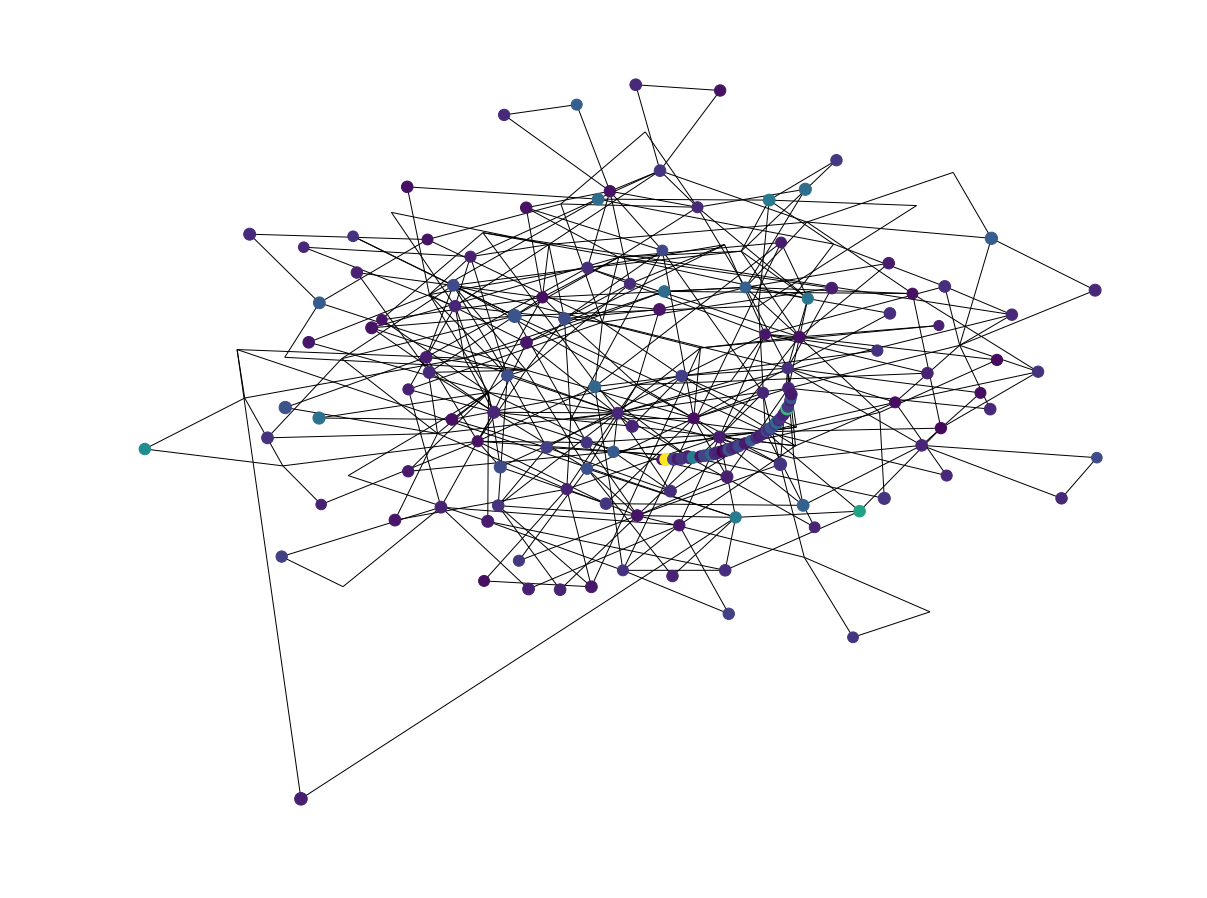

In [340]:
fig =plt.figure(figsize=(16, 12))
import matplotlib.pyplot as plt
nx.draw_kamada_kawai(G, node_color=[i[1] for i in features], node_size = [20*i[2] for i in features])
plt.show()

In [44]:
print(nx.__version__)

2.0
